# <center> BIGDATA X YONSEI CAMPUS </center>
### <center> 키워드 분석 및 문서 분석 </center>
#### <center> 키워드 분석: 키워드 자동완성 </center>
---------------------------
#### <div style="text-align: right"> 손근영 </div>

## 1. Keyword Analysis - 키워드 자동완성
### Motivation
* 사용자들은 액션을 귀찮아함
* 검색어 입력은 피곤한 일
 * 스마트폰에서 키보드 입력은 매우 힘든 일
* 사용자는 자신이 무엇을 찾으려하는지 모름
 * 대부분의 사용자들은 인터넷을 이용할 때 분명한 목적이 있지 않음
 * 대부분의 사용자는 big head/log tail 법칙에 따라 정보를 소비함
 * 최근 사용자들은 정보를 능동적으로 소비하지 않고 수동적으로 주입 당함

## 1. Keyword Analysis - 키워드 자동완성
### Key Idea
* 어째뜬 검색은 발생되고 검색 노출 로그는 생성됨
 * 어떻게 하면 더욱 유익하게 사용할 수 있을까?
 * 어떻게 하면 무엇을 찾을지 모르는, 검색어 입력을 귀찮아하는 사용자에게 검색을 이용하게 할 것인가?
* 많이 발생한 빈도의 키워드를 사용자기 키워드를 입력하는 동안 예측해서 보여주면?

## 2. 키워드 자동완성의 서비스 화면
<center><img src='img/03_01.png' height=50% width=50%></center>

## 3. 자동완성의 가치
* 사용자는 모바일 시대 이전부터 PC에서 오랜 시간 검색을 이용해왔음
 * PC의 검색어 입력은 모바일보다는 쉽지만 역시 피곤한 일
* 우리는 상당히 오랫동안 동일한 검색어를 다시 검색하는 습성이 있음 (ex 날씨)
* 찾고자 하는 내용은 PC나 모바일이나 같음
* 검색 노출 정보를 이용하여 여러사람의 검색 빅데이터를 재활용
 * 입력하고 있는 키워드를 예측해서 보여주면 검색 피로도를 줄일 수 있음
 


## 3. 자동완성의 가치

* 검색 피로도가 줄면?
 * 검색 액션에 부담이 적어짐 / 검색양이 증가함
--------------------
* 검색양이 증가하면?
 * PV 상승 / 이용자의 의도가 더욱 더 log안에 저장됨
 * 해당 사용자의 행태가 저정됨

## 4. 자동완성 방식 구상
### 로그 형태

<center><img src='img/01_13.png' height=50% width=50%></center>

### 알고리즘
* 검색 로그를 line by line으로 분리
* line을 \t 기준으로 분리
* 분리된 데이터에서 '검색어'를 획득
* 전체 로그에서 검색어 개수를 집계함
* 등장 횟수가 너무 작은 검색어를 삭제 후 높은 순으로 정렬
* 입력되는 문자열 $typing$이 주어졌을때 예상되는 키워드 $pred\_keywords$를 출력

## 4. 자동완성 방식 구상

### 알고리즘
$$ P(pred\_keyword|typing) \nonumber $$
* 주어진 중간 입력에 대하여 완성될 키워드를 예측하는 문제
* 사용자가 어떤 키워드를 완성하고 싶을지 알 수 없음
* 다른 사용자들이 기존에 입력한 키워드의 조건부 확률을 집계하여 높은 순서대로 보여줌

## 5. 자동완성 방식 설명
### 데이터 정의
* 빅데이터 저장소에 엄청나게 많은 검색 로그가 저장되어있다고 가정
* 많이 집계하면 많이 집계할 수록 사용자의 입력에 대한 coverage가 좋아짐

### 필수 모듈
* 전체 데이터에 대한 키워드 집계
<center><img src='img/03_02.png' height=50% width=50%></center>

### 필수 모듈
* 한글 자소 분리
 * 자동완성은 사용자의 키워드 입력 하나하나에 반응
 * 이것은 한글을 자소 단위로 분석해야한다는 것과 같음
 * 한글 유니코드에 대한 조합형 공식의 이해가 필요
<center><img src='img/03_03.png' height=60% width=60%></center>

## 5. 자동완성 방식 설명
### 자소(초성, 중성, 종성) 분리 예제

* 간소화한 예제지만 근본 원리는 같음
<center><img src='img/03_04.png' height=70% width=70%></center>
* 각 => 1110
 * 각/1000 => 1, 초성 ㄱ
 * (각 % 1000)/100 => 1, 중성 ㅏ
 * (각 % 1000 % 100)/10 => 1, 종성 ㄱ


In [1]:
import pandas as pd

In [4]:
#이전 시간에 처리했던 데이터 클랜징 시도
import csv 
df = pd.read_csv('data/sample_search_log.txt', sep='\t', header=None, names = ['date', 'id', 'keyword', 'result'],
                 quoting=csv.QUOTE_NONE)
df =  df[df["date"].map(str).map(len) == 15]
df['date'] = df.date.apply(lambda x: pd.datetime.strptime(x, '%Y%m%d-%H%M%S'))

In [5]:
# word count를 적용
df = df.groupby(by='keyword').count().sort_values(by='id', ascending=False)[['id']].rename(columns={"id": "cnt"})
res = df.copy()
res[:5]

,cnt
keyword,
여자아이돌 대마초,6576
박봄,4558
정다연,3889
안은정,2943
강민경 셀카,2936


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015C4C378208>]],
      dtype=object)

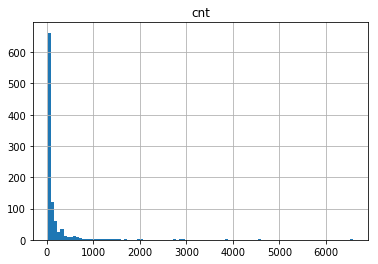

In [7]:
# count 별 키워드 개수 빈도
res[:1000].hist(bins = 100)

In [8]:
#완성된 word count를 사용자가 질의한 키워드에 prefix 검색을 시도하면 대상 키워드를 추출할 수 있음
res[res.index.str.startswith('삼성')][:5]

,cnt
keyword,
삼성카드,220
삼성전자,150
삼성모바일닷컴,100
삼성화재,40
삼성전기,39


In [9]:
from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output
text = widgets.Text()

def handle_submint(sender):
    clear_output()
    display(text)
    for k, v in get_suggest(text.value):
        print(k)

text.on_submit(handle_submint)

def get_suggest(raw, rows=10):
    return [(key, val[0])for key, val in res[res.index.str.startswith(raw)][:rows].iterrows()]

In [10]:
display(text)

Text(value='삼성')

삼성카드
삼성전자
삼성모바일닷컴
삼성화재
삼성전기
삼성생명
삼성중공업
삼성증권
삼성
삼성전자서비스센터


## 한계점

* 자동완성은 사용자의 입력이 불완전한 상태에도 동작함
 * 예) 삼ㅅ -> 삼성 출력
* 현재의 방식은 사용자의 로그에서 정말로 등장했던 입력에 대한 자동완성 밖에 출력해주지 못함
* 사용자 입력을 초성 중성 종성으로 분해하여 검색 대상으로 잡아주자

### 자소가 분리된 색인을 추가해여 보자
- unicode 한글은 다음과 같이 분해 될 수 있음
- 한글 => ㅎㅏㄴㄱㅡㄹ
- 한글은 0xAC00 부터 시작
- 초성 19개, 중성 21개, 종성 28개

### 한글을 완성시키는 조합 공식은 다음과 같음

<pre>
글자 = (초성 * 21 * 28) + (중성 * 28) + 종성
     = ((초성 * 21) + 중성) * 28 + 종성
</pre>

- 최종적으로 한글의 시작 범위인 OxAC00을 더해주면 유니코드상의 한글이 표현됨<br>
글자 = ((초성 * 21) + 중성) * 28 + 종성 + 0xAC00<br>

- 공식을 이용하여 주어진 글자에 대한 각 초성과 중성, 종성의 코드를 알아낼 수 있음

## quiz 1 
* 초성, 중성, 종성으로 한글입력을 나누는 함수를 작성해보자

In [11]:
def decomposeKStr(kstr):
    def decomposeKChar(ch):
        if not(0xAC00 <= ord(ch) <= 0xD7AF):
            return ch

        cho  = ["ㄱ", "ㄲ", "ㄴ", "ㄷ", "ㄸ", "ㄹ", "ㅁ", "ㅂ", "ㅃ", "ㅅ", "ㅆ", "ㅇ", "ㅈ", "ㅉ", "ㅊ", "ㅋ", "ㅌ", "ㅍ", "ㅎ" ]
        jung = ["ㅏ", "ㅐ", "ㅑ", "ㅒ", "ㅓ", "ㅔ", "ㅕ", "ㅖ", "ㅗ", "ㅘ", "ㅙ", "ㅚ", "ㅛ", "ㅜ", "ㅝ", "ㅞ", "ㅟ", "ㅠ", "ㅡ", "ㅢ", "ㅣ"]
        jong = ["", "ㄱ", "ㄲ", "ㄳ", "ㄴ", "ㄵ", "ㄶ", "ㄷ", "ㄹ", "ㄺ", "ㄻ", "ㄼ", "ㄽ", "ㄾ", "ㄿ", "ㅀ", "ㅁ", "ㅂ", "ㅄ", "ㅅ", "ㅆ", "ㅇ", "ㅈ", "ㅊ", "ㅋ", "ㅌ", "ㅍ", "ㅎ"]

        n = ord(ch) - 0xAC00

        #last = ???
        #middle = ???
        #first = ????
        return cho[first], jung[middle], jong[last]
    
    res = []
    for ch in kstr:
        res += decomposeKChar(ch)
    return res

In [12]:
"".join(decomposeKStr('today는 날씨가 10번째로 좋아'))

'todayㄴㅡㄴ ㄴㅏㄹㅆㅣㄱㅏ 10ㅂㅓㄴㅉㅐㄹㅗ ㅈㅗㅎㅇㅏ'

In [13]:
df2 = df.reset_index()

In [14]:
#자소분해를 적용시켜보자
df2['decompose'] = df2.keyword.map(lambda x : "".join(decomposeKStr(str(x))))
df2[:5]

,keyword,cnt,decompose
0,여자아이돌 대마초,6576,ㅇㅕㅈㅏㅇㅏㅇㅣㄷㅗㄹ ㄷㅐㅁㅏㅊㅗ
1,박봄,4558,ㅂㅏㄱㅂㅗㅁ
2,정다연,3889,ㅈㅓㅇㄷㅏㅇㅕㄴ
3,안은정,2943,ㅇㅏㄴㅇㅡㄴㅈㅓㅇ
4,강민경 셀카,2936,ㄱㅏㅇㅁㅣㄴㄱㅕㅇ ㅅㅔㄹㅋㅏ


In [15]:
# 완성된 데이터 필드를 정리한다
df2 = df2[['decompose', 'keyword', 'cnt']]
df2 = df2.set_index('decompose')
df2[:5]

,keyword,cnt
decompose,,
ㅇㅕㅈㅏㅇㅏㅇㅣㄷㅗㄹ ㄷㅐㅁㅏㅊㅗ,여자아이돌 대마초,6576
ㅂㅏㄱㅂㅗㅁ,박봄,4558
ㅈㅓㅇㄷㅏㅇㅕㄴ,정다연,3889
ㅇㅏㄴㅇㅡㄴㅈㅓㅇ,안은정,2943
ㄱㅏㅇㅁㅣㄴㄱㅕㅇ ㅅㅔㄹㅋㅏ,강민경 셀카,2936


In [16]:
from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output
text = widgets.Text()

def handle_submint(sender):
    clear_output()
    display(text)
    for k, v in get_suggest("".join(decomposeKStr(text.value))):
        print(k)

#text.observe(handle_submint)
text.on_submit(handle_submint)

def get_suggest(raw, rows=10):
    return [(val[0], val[1])for key, val in df2[df2.index.str.startswith(raw)][:rows].iterrows()]

In [17]:
display(text)

Text(value='삼ㅅ')

삼성카드
삼성전자
삼성모바일닷컴
삼성화재
삼성전기
삼성생명
삼성중공업
삼성증권
삼성
삼성전자서비스센터


## 한계점

* coverage는 넓어졌지만 실제 자동완성은 이렇게 동작하지 않음
* 가장 큰 원인은 bigdata 자체임
* 오늘날 사용자의 검색로그는 하루당 수천만~수억건이 쌓이게 됨
* 위의 방식은 저장된 모든 로그에서 검색 입력과 시작부터 매칭된 키워드를 전부 검색하는 방식
* 이것은 사용자가 많아지고 로그가 많아질 수록 부하가 걸리는 방식임

## 개선점

* 사용자의 입력과 동일하기 시작한 키워드들을 전부 그룹을 걸어주는 것은 어떨까
 * ex) 감자 라고 입력하면다면, ㄱ으로 시작하는 모든 검색어, 'ㄱㅏ'로 시작하는 모든 검색어, 'ㄱㅏㅁ'으로 시작하는 모든 검색어를 탐색
* 해당 방식으로 로그의 모든 검색어를 탐색하지 않고, 실제 사용자가 입력한 검색어만 탐색할 수 있게 개선 할 수 있음
* 그러기 위해서는 생성된 자동완성 키워드를 시작부터 자모부터 한글자씩 늘려가며 확장할 필요가 있음

In [22]:
len(df2[df2['cnt'] > 2]), len(df2)

(20627, 334599)

In [35]:
df3 = df2[df2['cnt'] > 2].reset_index()
df3['expand_decompose'] = df3.apply(lambda row: [row['decompose'][:i+1] for i in range(len(row['decompose']))], axis=1)
df3[:5]

,decompose,keyword,cnt,expand_decompose
0,ㅇㅕㅈㅏㅇㅏㅇㅣㄷㅗㄹ ㄷㅐㅁㅏㅊㅗ,여자아이돌 대마초,6576,"[ㅇ, ㅇㅕ, ㅇㅕㅈ, ㅇㅕㅈㅏ, ㅇㅕㅈㅏㅇ, ㅇㅕㅈㅏㅇㅏ, ㅇㅕㅈㅏㅇㅏㅇ, ㅇㅕㅈ..."
1,ㅂㅏㄱㅂㅗㅁ,박봄,4558,"[ㅂ, ㅂㅏ, ㅂㅏㄱ, ㅂㅏㄱㅂ, ㅂㅏㄱㅂㅗ, ㅂㅏㄱㅂㅗㅁ]"
2,ㅈㅓㅇㄷㅏㅇㅕㄴ,정다연,3889,"[ㅈ, ㅈㅓ, ㅈㅓㅇ, ㅈㅓㅇㄷ, ㅈㅓㅇㄷㅏ, ㅈㅓㅇㄷㅏㅇ, ㅈㅓㅇㄷㅏㅇㅕ, ㅈㅓㅇ..."
3,ㅇㅏㄴㅇㅡㄴㅈㅓㅇ,안은정,2943,"[ㅇ, ㅇㅏ, ㅇㅏㄴ, ㅇㅏㄴㅇ, ㅇㅏㄴㅇㅡ, ㅇㅏㄴㅇㅡㄴ, ㅇㅏㄴㅇㅡㄴㅈ, ㅇㅏㄴ..."
4,ㄱㅏㅇㅁㅣㄴㄱㅕㅇ ㅅㅔㄹㅋㅏ,강민경 셀카,2936,"[ㄱ, ㄱㅏ, ㄱㅏㅇ, ㄱㅏㅇㅁ, ㄱㅏㅇㅁㅣ, ㄱㅏㅇㅁㅣㄴ, ㄱㅏㅇㅁㅣㄴㄱ, ㄱㅏㅇ..."


In [90]:
df4 = df3['expand_decompose'].apply(pd.Series).unstack().dropna()
df4 = df4.to_frame('jaso').reset_index()[['level_1', 'jaso']].set_index('level_1')
df4[:5]

,jaso
level_1,
0,ㅇ
1,ㅂ
2,ㅈ
3,ㅇ
4,ㄱ


In [91]:
df3.columns, df4.columns

(Index(['decompose', 'keyword', 'cnt', 'expand_decompose'], dtype='object'),
 Index(['jaso'], dtype='object'))

In [93]:
#자소와 키워드를 조인함
df5 = df3.merge(df4, how='left', left_index=True, right_index=True)[['jaso', 'keyword', 'cnt']]
df5[:5]

,jaso,keyword,cnt
0,ㅇ,여자아이돌 대마초,6576
0,ㅇㅕ,여자아이돌 대마초,6576
0,ㅇㅕㅈ,여자아이돌 대마초,6576
0,ㅇㅕㅈㅏ,여자아이돌 대마초,6576
0,ㅇㅕㅈㅏㅇ,여자아이돌 대마초,6576


In [104]:
#모든 자소가 같은 키워드들을 그룹하여 cnt가 많은 기준으로 20개만 남겨둠
df6 = df5.groupby('jaso').apply(lambda x: x.sort_values(["cnt"], ascending = False).head(20)).reset_index(drop=True)

In [110]:
#모든 키워드에 대하여 20개가 등장하는지 확인함
len(df6[df6['jaso'] == 'ㅂ']), len(df6[df6['jaso'] == 'ㅂㅏ']), len(df6[df6['jaso'] == 'ㅂㅏㄱ'])

(20, 20, 20)

In [113]:
from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output
text = widgets.Text()

def handle_submint(sender):
    clear_output()
    display(text)
    for k, v in get_suggest("".join(decomposeKStr(text.value))):
        print(k)

#text.observe(handle_submint)
text.on_submit(handle_submint)

def get_suggest(raw, rows=10):
    ##TODO 구현해보자
    

In [114]:
display(text)

Text(value='박봄')

박봄
박봄 대마초
박봄 성형전 사진
박봄 건강식품
박봄 출렁
박봄 담배
박봄 성형중독
박봄 대마
박봄 마약
박봄 루머
